In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ÖDEV 1: PCA yardımı ile Classification,

Bu ödevde "Credit Risk Prediction" veri setini kullanacağız. Amacımız, verinin boyut sayısını düşürerek olabildiğince yüksek accuracy değerini alabilmek. Aşağıda verinin okunma ve temizlenme kısmını hazırlayıp vereceğim. Devamında ise yapmanız gerekenler:

1. PCA kullanarak verinin boyutunu düşürmek
    * Önce explained varience ratio değerini inceleyerek veriyi kaç boyuta düşürebileceğini kontrol et.
    * Daha sonra farklı boyutlarda denemeler yaparak boyutu düşürülmüş verileri elde et.
2. Classification modellerini dene
    * Logistic Regression
    * Random Forest
    * ve eğer istersen herhangi bir modelle daha

İsteğe bağlı olarak, verinin boyutunu düşürmek için diğer yöntemleri de kullanıp en yüksek accuracy değerini almayı deneyebilirsin.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df: pd.DataFrame = pd.read_csv('/content/drive/MyDrive/week4/credit_risk_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df = df[12000:]

In [ ]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              514
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2008
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [ ]:
# Null değerleri sütun ortalaması ile dolduruyoruz
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [ ]:
df.duplicated().sum()

75

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,20506.0,30.166195,6.648310,20.00,26.00,29.00,33.00,144.00
person_income,20506.0,74238.969667,73884.930585,4000.00,41514.50,62048.50,90000.00,6000000.00
person_emp_length,20506.0,5.205306,4.465783,0.00,2.00,4.00,7.00,41.00
loan_amnt,20506.0,10272.637277,6591.090469,500.00,5000.00,9000.00,14000.00,35000.00
loan_int_rate,20506.0,11.046459,3.092490,5.42,8.49,10.99,13.16,23.22
loan_status,20506.0,0.206671,0.404927,0.00,0.00,0.00,0.00,1.00
loan_percent_income,20506.0,0.166042,0.105965,0.00,0.08,0.14,0.22,0.78
cb_person_cred_hist_length,20506.0,7.446065,4.287355,2.00,4.00,7.00,10.00,30.00


In [ ]:
# Outlier temizliği
df = df[df['person_age']<=100]
df = df[df['person_emp_length'] <= 60]
df = df[df['person_income']<=4e6]

In [ ]:
# Kategorik verileri alıyoruz ve one hot encoding haline getiriyoruz
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [ ]:
encoded_cat_cols = pd.get_dummies(cat_cols)
df.drop(df.select_dtypes(include=['object']).columns, axis=1,inplace=True)
df = pd.concat([df,encoded_cat_cols], axis=1)

In [ ]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [ ]:
# Verileri train ve test olarak ikiye ayırıyoruz

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(1, test_size=0.1)
train_idx, test_idx = next(split.split(X, y))
train_x = X[train_idx]
test_x = X[test_idx]

train_y = y[train_idx]
test_y = y[test_idx]

## Kolay gelsin!

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X2D = isomap.fit_transform(train_x)

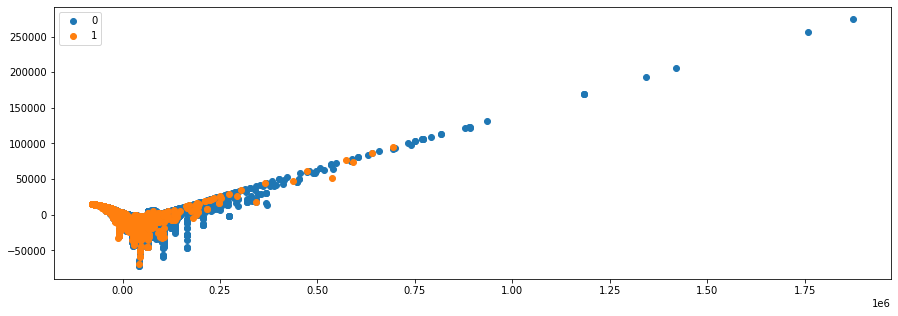

In [ ]:

figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

In [ ]:
train_x.shape

(18454, 26)

In [ ]:
train_y.shape

(18454,)

In [ ]:
from sklearn.decomposition import PCA

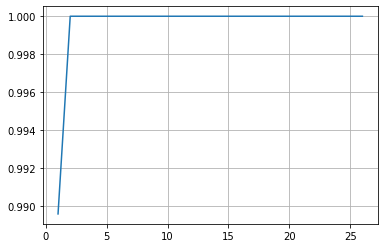

In [ ]:
pca = PCA()
pca.fit(train_x)
cumsum_data = np.cumsum(pca.explained_variance_ratio_)
x_tick = np.arange(1,len(cumsum_data)+1, 1)
plt.grid(True)
plt.plot(x_tick, cumsum_data)

<Figure size 1080x360 with 0 Axes>

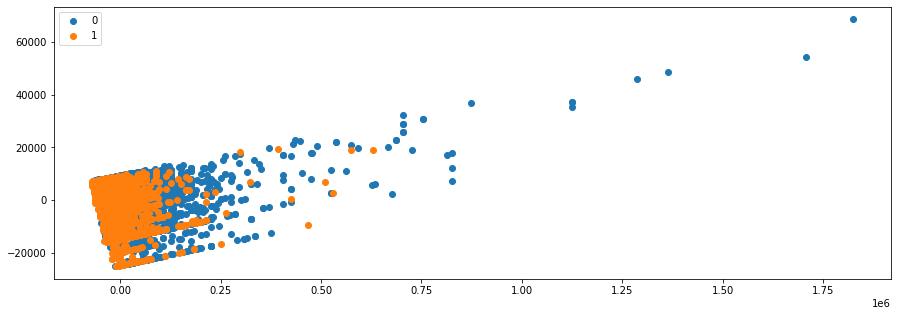

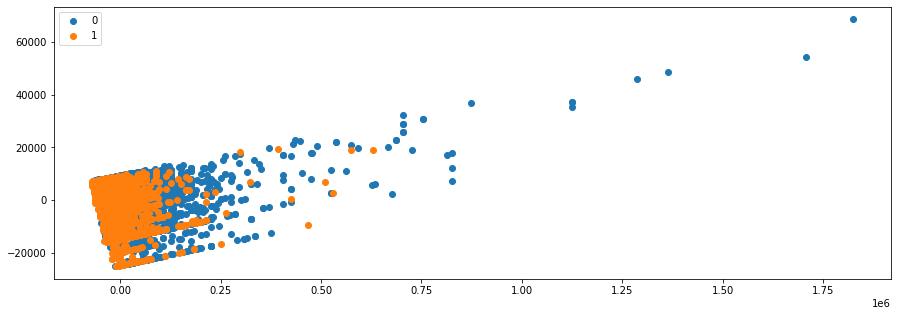

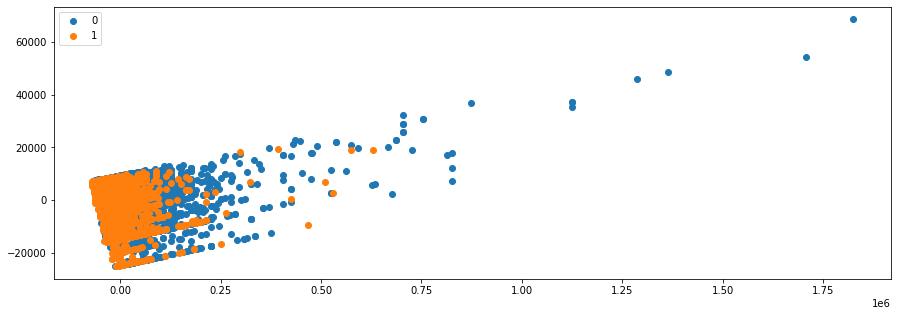

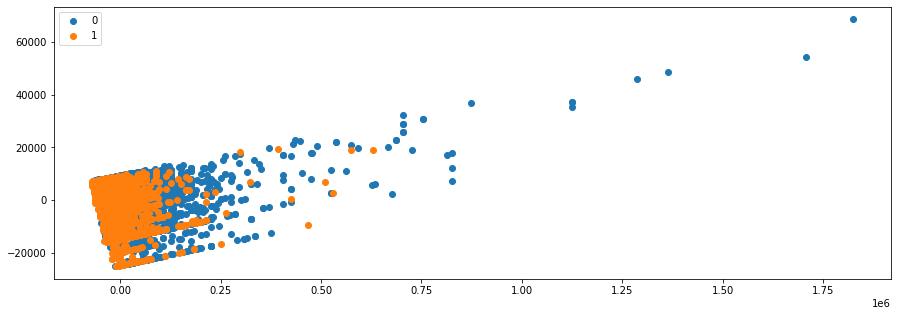

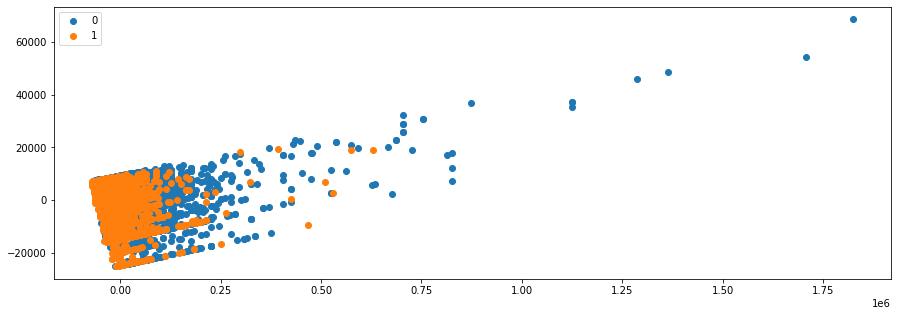

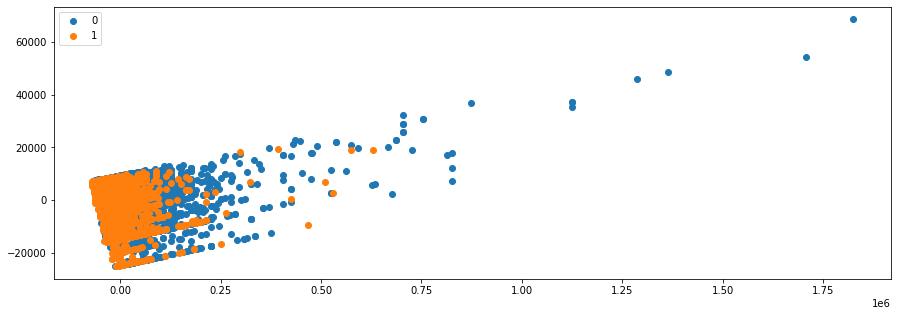

In [ ]:
for comp_size in [2, 3, 4, 5, 6, 7]:
    pca = PCA(n_components=comp_size)
    X2D = pca.fit_transform(train_x)
    figure = plt.figure(1,(15,5))
    for label in set(train_y):
        data = X2D[train_y==label]
        plt.scatter(data[:,0], data[:,1],label=label)
    plt.legend()
    plt.show()

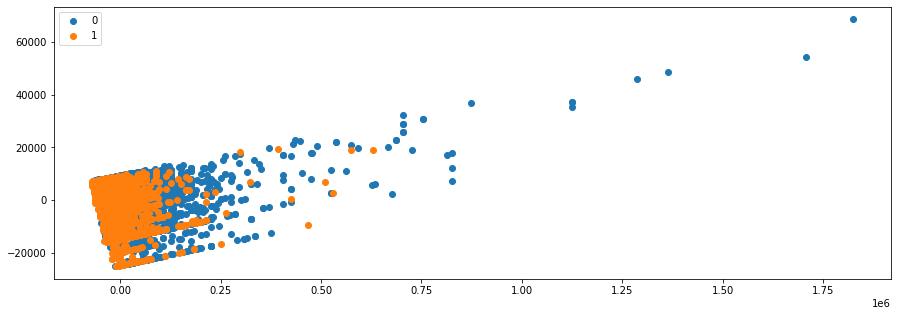

In [ ]:
pca = PCA(n_components=4)
X2D = pca.fit_transform(train_x)
figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


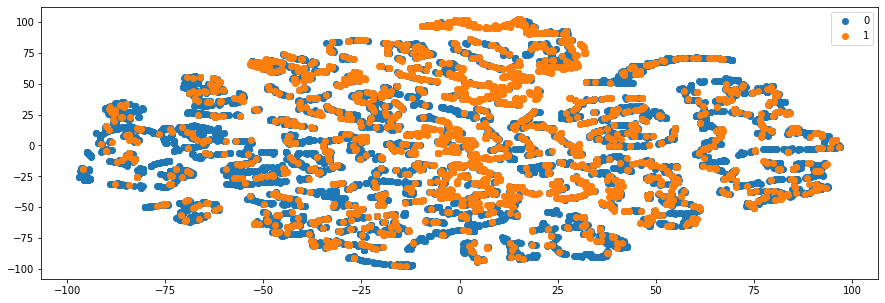

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X2D = tsne.fit_transform(train_x)
X2D_test = tsne.fit_transform(test_x)
figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X2D

array([[-11.010011 ,  -3.9020014],
       [-27.542622 , -28.165571 ],
       [ 70.757866 , -57.460888 ],
       ...,
       [ 38.706154 ,  -8.590217 ],
       [-40.839596 ,  52.3125   ],
       [ 41.782154 , -17.745848 ]], dtype=float32)

In [ ]:
lr = LinearRegression()
lr.fit(X2D, train_y)
lr.score(X2D_test, test_y)

-0.042206730368235856

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)
rfr.score(test_x, test_y)

0.6753461394394127

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X2D, train_y)
rfr.score(X2D_test, test_y)

-0.5439288829658395

In [ ]:
dcr = DecisionTreeRegressor()
dcr.fit(train_x, train_y)
dcr.score(test_x, test_y)

0.35483323862647975

In [ ]:
dcr = DecisionTreeRegressor()
dcr.fit(X2D, train_y)
dcr.score(X2D_test, test_y)

-1.2692328599923468

## PCA Test 

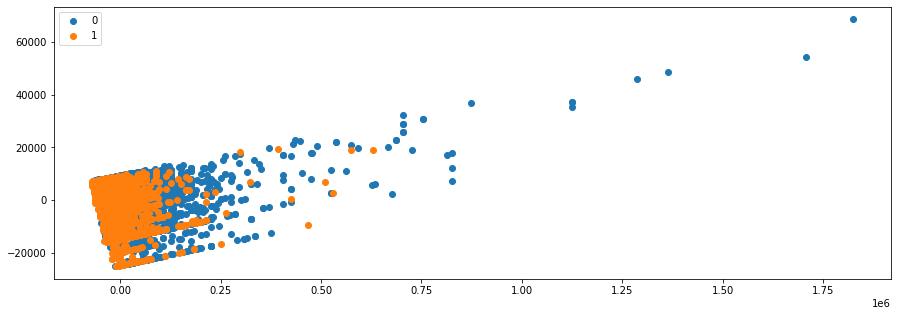

Lr: 6.902395227648128e-05
RFT:  -0.9311583415477034
DCR:  -0.8314411290603154


In [ ]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(train_x)
X2Dtest = pca.fit_transform(test_x)
figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

lr = LinearRegression()
lr.fit(X2D, train_y)
print("Lr:", lr.score(X2D_test, test_y))

rfr = RandomForestRegressor()
rfr.fit(X2D, train_y)
print("RFT: ",rfr.score(X2D_test, test_y))

dcr = DecisionTreeRegressor()
dcr.fit(X2D, train_y)
print("DCR: ", dcr.score(X2D_test, test_y))

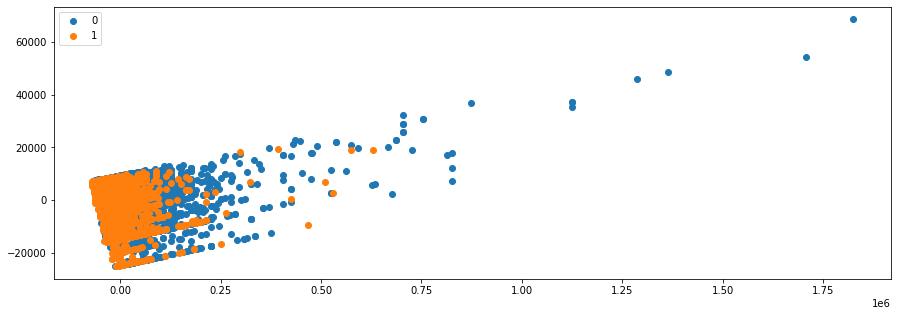

ValueError: ignored

In [ ]:
pca = PCA(n_components=3)
X2D = pca.fit_transform(train_x)
X2Dtest = pca.fit_transform(test_x)
figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

lr = LinearRegression()
lr.fit(X2D, train_y)
print("Lr:", lr.score(X2D_test, test_y))

rfr = RandomForestRegressor()
rfr.fit(X2D, train_y)
print("RFT: ",rfr.score(X2D_test, test_y))

dcr = DecisionTreeRegressor()
dcr.fit(X2D, train_y)
print("DCR: ", dcr.score(X2D_test, test_y))

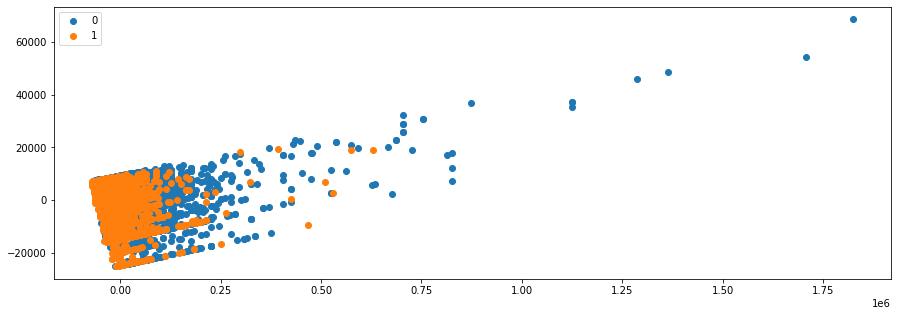

ValueError: ignored

In [ ]:
pca = PCA(n_components=4)
X2D = pca.fit_transform(train_x)
X2Dtest = pca.fit_transform(test_x)
figure = plt.figure(1,(15,5))
for label in set(train_y):
    data = X2D[train_y==label]
    plt.scatter(data[:,0], data[:,1],label=label)
plt.legend()
plt.show()

lr = LinearRegression()
lr.fit(X2D, train_y)
print("Lr:", lr.score(X2D_test, test_y))

rfr = RandomForestRegressor()
rfr.fit(X2D, train_y)
print("RFT: ",rfr.score(X2D_test, test_y))

dcr = DecisionTreeRegressor()
dcr.fit(X2D, train_y)
print("DCR: ", dcr.score(X2D_test, test_y))